In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set(style='whitegrid')



In [8]:
# Download and load the dataset
def load_data():
    # Replace the file path with the correct path to the dataset
    df = pd.read_csv('C:/VS code/IDP/Data/heart.csv')
    return df

# Load the dataset
df = load_data()
df.head()  # Display the first few rows to verify


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


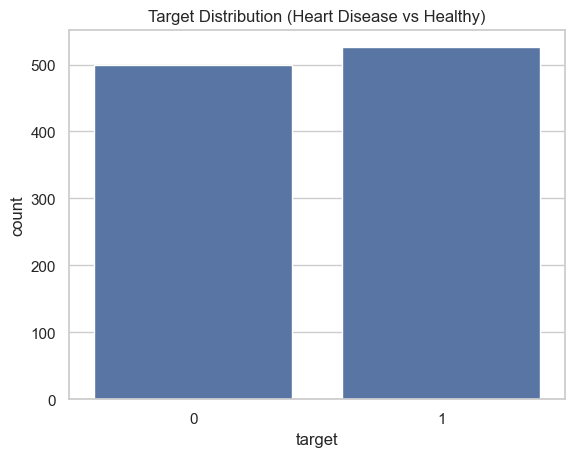

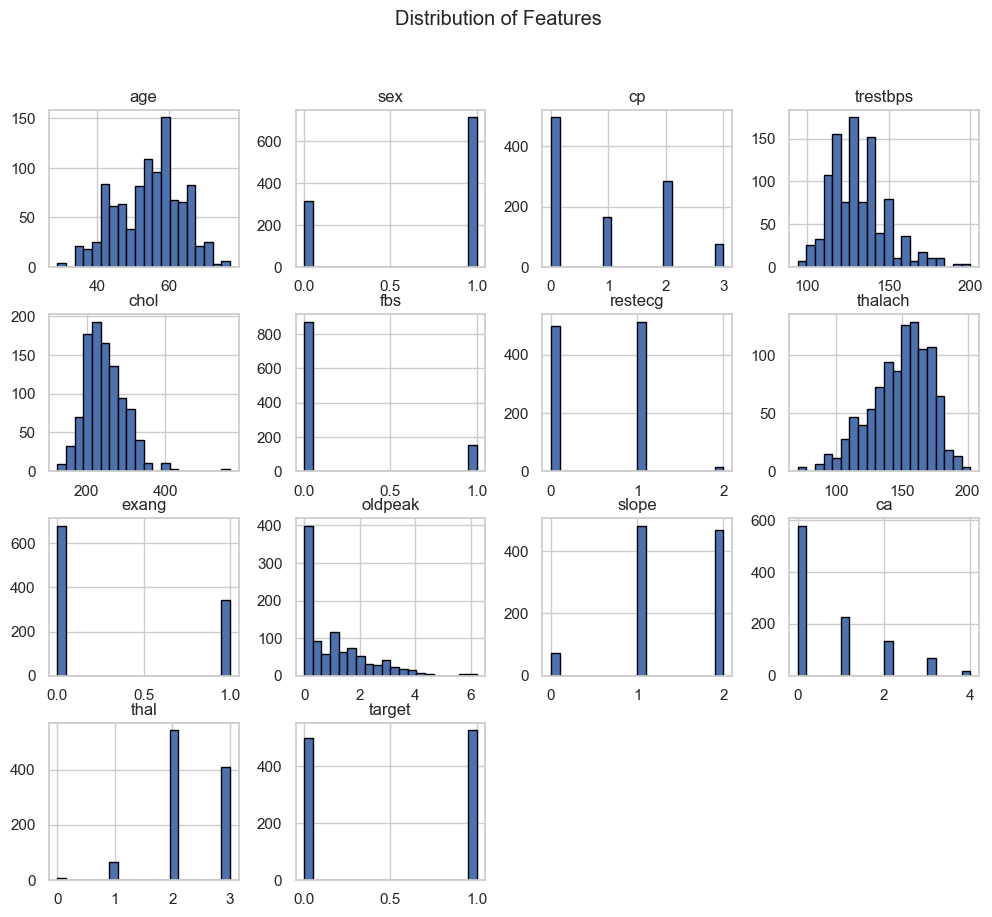

In [9]:
# Visualize the dataset target distribution and feature distributions
def plot_dataset(df):
    sns.countplot(x='target', data=df)
    plt.title('Target Distribution (Heart Disease vs Healthy)')
    plt.show()

    df.hist(figsize=(12, 10), bins=20, edgecolor='black')
    plt.suptitle('Distribution of Features')
    plt.show()

plot_dataset(df)



In [10]:
# Preprocess the data and convert to 2D representation
def preprocess_data(df):
    # Separate features and target
    X = df.drop('target', axis=1)
    y = df['target']
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Calculate dimensions for reshaping
    num_features = X_scaled.shape[1]
    if num_features % 2 != 0:
        # Add padding to make the feature count even
        X_scaled_padded = np.pad(X_scaled, ((0, 0), (0, 1)), mode='constant')
    else:
        X_scaled_padded = X_scaled
    
    # Reshape into (samples, height, width, channels)
    height = X_scaled_padded.shape[1] // 2  # This will be 7 for 14 features
    X_reshaped = X_scaled_padded.reshape(-1, height, 2, 1)
    
    # Convert target to categorical
    y_cat = to_categorical(y)
    
    return X_reshaped, y_cat

X_reshaped, y_cat = preprocess_data(df)

# Show the reshaped data
print("Reshaped data shape:", X_reshaped.shape)
print("Target shape:", y_cat.shape)


Reshaped data shape: (1025, 7, 2, 1)
Target shape: (1025, 2)


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (820, 7, 2, 1)
Testing set shape: (205, 7, 2, 1)


In [12]:
# Create the CNN model
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 2), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 1)),
        Conv2D(64, (3, 2), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

input_shape = X_reshaped.shape[1:]  # (height, width, channels)
model = create_model(input_shape)

# Show model summary
model.summary()


c:\VS code\IDP\IDP\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 7, 2, 32)       │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 2, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,474 (146.38 KB)

 Trainable params: 37,474 (146.38 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5650 - loss: 0.6813 - val_accuracy: 0.6646 - val_loss: 0.6326
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7574 - loss: 0.5789 - val_accuracy: 0.7134 - val_loss: 0.5526
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8295 - loss: 0.4386 - val_accuracy: 0.7256 - val_loss: 0.5645
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8266 - loss: 0.4124 - val_accuracy: 0.7378 - val_loss: 0.5113
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8700 - loss: 0.3558 - val_accuracy: 0.7622 - val_loss: 0.4817
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8695 - loss: 0.3017 - val_accuracy: 0.7927 - val_loss: 0.4408
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8956 - loss: 0.2866 - val_accuracy: 0.7805 - val_loss: 0.4348
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8919 - loss: 0.2576 - val_accuracy: 0.8354 - val_loss

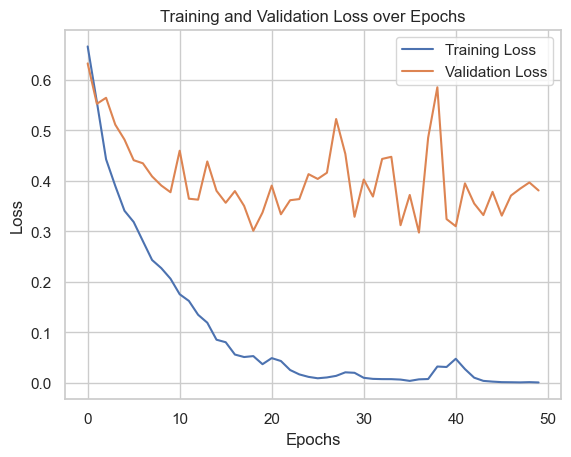

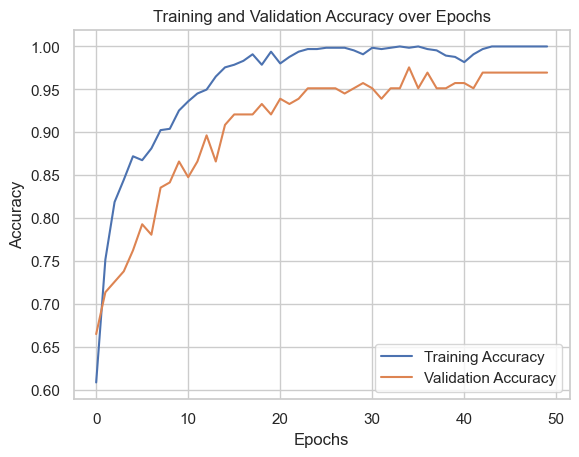

In [14]:
# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training & validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)


In [15]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.5100 

Test accuracy: 0.9659


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


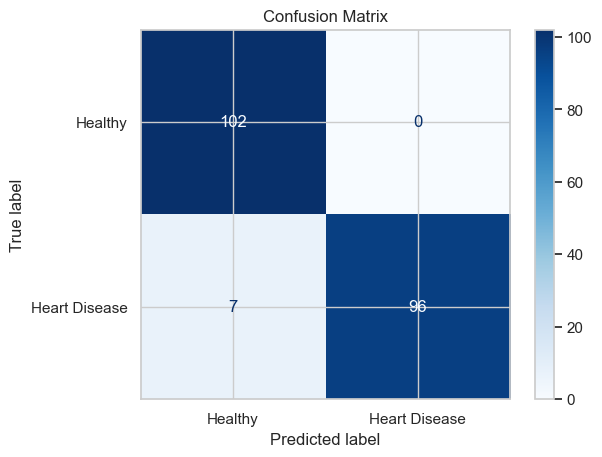

In [16]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Heart Disease'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Make predictions and plot confusion matrix
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
